<a href="https://colab.research.google.com/github/FelixSnz/MachineLearningTests/blob/master/regVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, datasets
import pickle

In [42]:
#Without Dataframe
data = datasets.load_diabetes()
print(type(data))
print(data.feature_names)
X, y = datasets.load_diabetes(return_X_y=True)
print(X[:, 0].size)

<class 'sklearn.utils.Bunch'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
442


In [54]:
#With Dataframe
data_bunch = datasets.load_diabetes()
data = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
data['target'] = data_bunch.target
print(type(data))
print(data.columns)
X = np.array(data.drop('target', 1))
y = np.array(data['target'])
print(data['age'].size)

<class 'pandas.core.frame.DataFrame'>
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
442


In [4]:
#Separando los datos con model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.1)
print(x_train.shape)

(397, 10)


In [52]:
#Separando los datos manualmente 
x_train = X[0:-20]
x_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]


In [7]:
#Creacion y entrenamiento del modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)
print('Coeficients:', '\n', model.coef_)
print('Intercept:', '\n', model.intercept_)

0.41798544208995814
Coeficients: 
 [   1.43852906 -224.5629612   500.2593761   340.56750956 -849.2515311
  542.23893645   90.01438672  149.14261129  781.92316444   49.02565796]
Intercept: 
 153.23340442701277


In [ ]:
#Guardando el modelo entrenado
with open("diabetes.pickle", "wb") as f:
      pickle.dump(regression, f)

#importando un modelo ya entrenado
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [9]:
#Obteniendo el mejor modelo de n ciclos
n = 1000
prev_acc = 0
for _ in range(n):
  x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.05)
  regression = linear_model.LinearRegression()
  regression.fit(x_train, y_train)
  acc = regression.score(x_test, y_test)
  if acc > best_score:
    with open("diabetes.pickle", "wb") as f:
      pickle.dump(regression, f)
    best_score = acc
    print(acc)

0.24311535232678272
0.4168073369949039
0.5065290657256469
0.5946698859662001
0.6198826976662538
0.7693823828442554
0.7704219000009347
0.7742070519947543
0.779876167885637
0.8210666283830611
0.8319100276920469
0.8349743395479396
0.8607816832592339


In [10]:
predictions = model.predict(x_test)

for i in range(len(predictions)):
  print("Actual:", y_test[i], " Predicted:", predictions[i])

Actual: 174.0  Predicted: 180.47073230506157
Actual: 170.0  Predicted: 137.91211565119306
Actual: 200.0  Predicted: 144.57120036323926
Actual: 97.0  Predicted: 107.14100626559366
Actual: 85.0  Predicted: 176.74874915172353
Actual: 265.0  Predicted: 201.93631010329722
Actual: 128.0  Predicted: 168.4668722287112
Actual: 277.0  Predicted: 254.4730812390793
Actual: 265.0  Predicted: 168.4114714490407
Actual: 288.0  Predicted: 209.8556350901024
Actual: 232.0  Predicted: 193.019644545871
Actual: 138.0  Predicted: 76.45481430188364
Actual: 122.0  Predicted: 172.61042043166321
Actual: 31.0  Predicted: 98.06007724783925
Actual: 232.0  Predicted: 232.42480810929845
Actual: 102.0  Predicted: 109.03616186721825
Actual: 50.0  Predicted: 142.73542665491212
Actual: 302.0  Predicted: 149.06481945959254
Actual: 242.0  Predicted: 173.49684990822647
Actual: 127.0  Predicted: 121.6323214106502
Actual: 185.0  Predicted: 145.85110390078484
Actual: 143.0  Predicted: 176.2316328798605
Actual: 279.0  Predicted

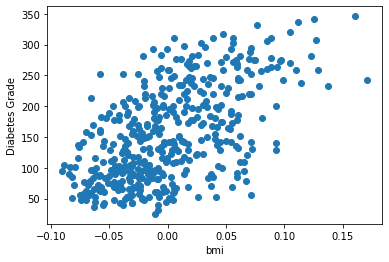

In [51]:
# Drawing and plotting model
plt.scatter(X[:, 2], y)

plt.xlabel(plot)
plt.ylabel("Diabetes Grade")
plt.show()